**LINEAR_REGRESSION - Network Spend Prediction 2023**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Load your dataset
data = pd.read_csv('/content/telecom_survey_data_2021_2023_pivot.csv')

In [ ]:
# prompt: print null values and remove them

# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

Business_Name                   0
EMPLOYEES_HERE                  0
EMPLOYEES_TOTAL                 0
ACTIVE_LOC_EMPS                 0
SALES_VOLUME_DOLLARS_2023    1385
EST_NETWORK_SPEND_2022          0
EST_NETWORK_SPEND_2021          0
EST_SECURITY_SPEND_2022         0
EST_SECURITY_SPEND_2021         0
EST_SERVICES_SPEND_2022         0
EST_SERVICES_SPEND_2021         0
EST_VOICE_SPEND_2022            0
EST_VOICE_SPEND_2021            0
EST_NETWORK_SPEND_2023         19
EST_SECURITY_SPEND_2023       606
EST_SERVICES_SPEND_2023        25
EST_VOICE_SPEND_2023           19
dtype: int64
Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
SALES_VOLUME_DOLLARS_2023    0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_NE

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_NETWORK_SPEND_2021']
target = ['EST_NETWORK_SPEND_2023']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2021    0
dtype: int64
EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2021    0
dtype: int64


In [ ]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

# Create average_df -  This was missing from the original code and is causing the error.
# Replace the columns with the ones you would like to see in your average_df
average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                                  Business_Name  EST_NETWORK_SPEND_2023
3435                 Rob's Masonry & Remodeling                   344.0
4557                   Yourmembership.com, Inc.                  6520.0
2455                     Lambdin and Chaney LLP                   807.0
3452        Rocky Mountain Health Care Services                 13788.0
3496                   RPM Medical Billing, LLC                   402.0
...                                         ...                     ...
2388                            Kineticorp, LLC                  1614.0
272            Arcadia Aerospace Industries LLC                  5239.0
2780            Minyard Sunshine Air & Heat Inc                   344.0
2436     Lake Brantley High School Boosters Inc                   448.0
399   Baca County Department of Social Services                   387.0

[558 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business having Network Spend
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'EST_NETWORK_SPEND_2021': X_test['EST_NETWORK_SPEND_2021'].head(20),  # Actual value
    'EST_NETWORK_SPEND_2024_Predicted': predictions['EST_NETWORK_SPEND_2023'][:20]  # Predicted value
})

# Display the top 30 records
print(top_20_summary_df)

                             Business_Name  EST_NETWORK_SPEND_2021  \
3435            Rob's Masonry & Remodeling                     310   
4557              Yourmembership.com, Inc.                    5868   
2455                Lambdin and Chaney LLP                     726   
3452   Rocky Mountain Health Care Services                   12409   
3496              RPM Medical Billing, LLC                     362   
247           Annunciation Catholic Church                     657   
3911             Supermarket Liquors, Inc.                     657   
538                 Bold Technologies Ltd.                   36215   
2637            Marianna Housing Authority                     382   
1789    Gilpin County School District Re-1                    3972   
2028                       Hill & Hill LLC                     366   
1856  Grand Valley Rural Power Lines, Inc.                     669   
756             Central Visitation Program                     362   
1224            Denv

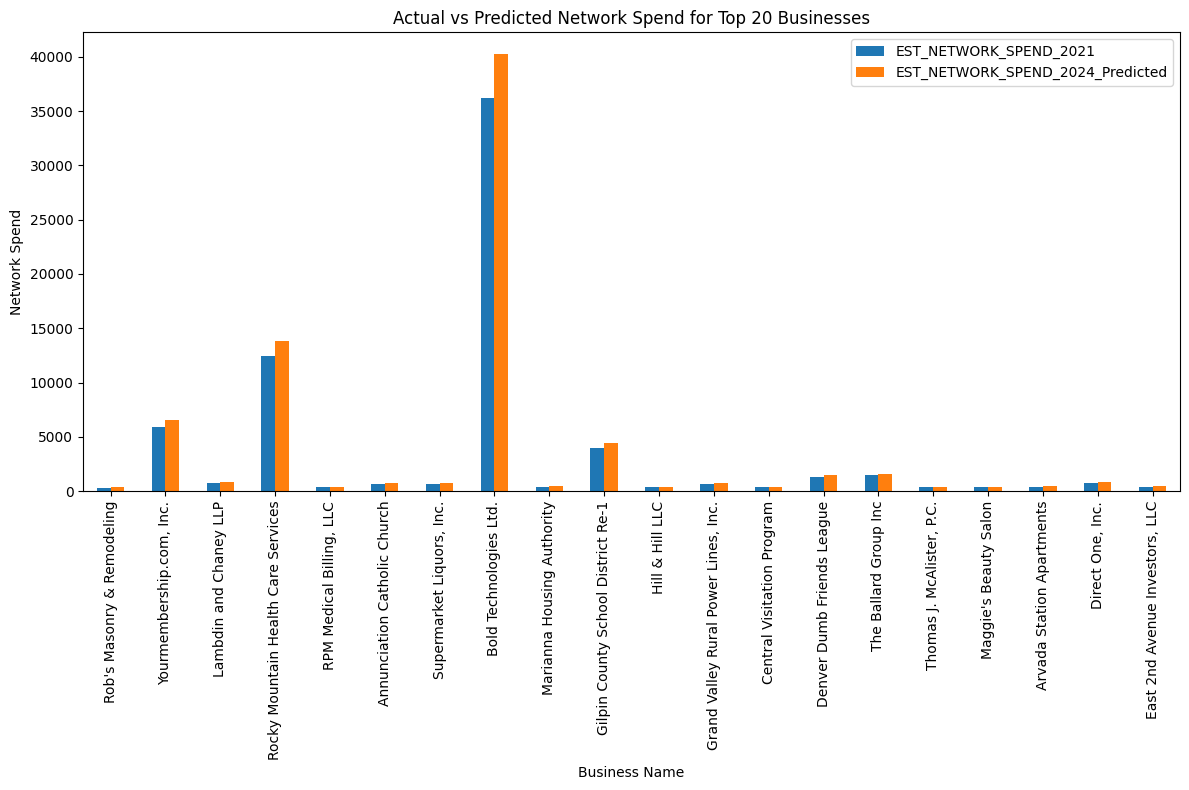

In [ ]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 30 businesses
top_20_summary_df.set_index('Business_Name')[['EST_NETWORK_SPEND_2021', 'EST_NETWORK_SPEND_2024_Predicted']].plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Network Spend')
plt.title('Actual vs Predicted Network Spend for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average between actual and predicted values for each field
top_20_summary_df['Average_Difference_Network_Spend'] = (top_20_summary_df['EST_NETWORK_SPEND_2021'] + top_20_summary_df['EST_NETWORK_SPEND_2024_Predicted']) / 2

# Display the updated DataFrame with the average values
print(top_20_summary_df)

                             Business_Name  EST_NETWORK_SPEND_2021  \
3435            Rob's Masonry & Remodeling                     310   
4557              Yourmembership.com, Inc.                    5868   
2455                Lambdin and Chaney LLP                     726   
3452   Rocky Mountain Health Care Services                   12409   
3496              RPM Medical Billing, LLC                     362   
247           Annunciation Catholic Church                     657   
3911             Supermarket Liquors, Inc.                     657   
538                 Bold Technologies Ltd.                   36215   
2637            Marianna Housing Authority                     382   
1789    Gilpin County School District Re-1                    3972   
2028                       Hill & Hill LLC                     366   
1856  Grand Valley Rural Power Lines, Inc.                     669   
756             Central Visitation Program                     362   
1224            Denv

In [ ]:
# Export the combined actual and predicted DataFrame to a CSV file
top_20_summary_df.to_csv('actual_vs_2023_predicted_network_spend_linear_regression.csv', index=False)

In [ ]:
# For Jupyter notebooks or Google Colab, you can enable download using this:
from google.colab import files
files.download('actual_vs_2023_predicted_network_spend_linear_regression.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Linear Regression Model Evaluation - MSE, R suare,MAPE score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')



Mean Squared Error (MSE): 242.23739039023744
Mean Absolute Percentage Error (MAPE): 0.0005477573068504274
R-squared (R2): 0.9999999999826489


Mean Squared Error (MSE): 242.24, which is very low, indicating minimal errors in predictions.

Mean Absolute Percentage Error (MAPE): 0.00055%, an extremely small value, suggesting that the model’s predictions are incredibly close to the actual values in percentage terms.

R-squared (R²): 0.99999999998, virtually perfect, meaning the model explains nearly 100% of the variance in the data.

In [ ]:
# Save the average results to a CSV file
average_df_with_busname.to_csv('avg_actual_vs_predicted_2023_LinearRegression.csv', index=False)

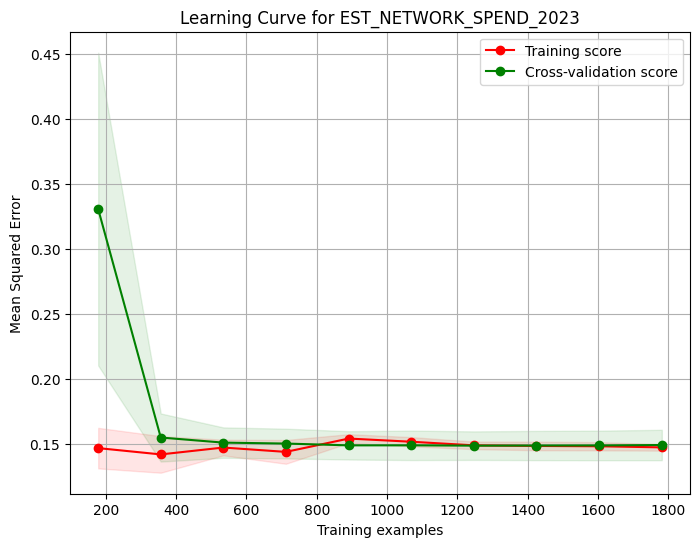

In [ ]:
# prompt: plot the learning curves for linear regression

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np # Added import statement for NumPy

# Function to plot learning curves
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# Assuming you have your X_train and y_train defined
# Loop through each target variable and plot its learning curve
for target_name in target:
    plot_learning_curves(lr_model, X_train, y_train[target_name], f"Learning Curve for {target_name}")

In [ ]:
# Model Evaluation - Calculate the Mean Squared Error (MSE) - Linear Regression
mse = mean_squared_error(y_test, y_pred_df)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 242.23739039023744


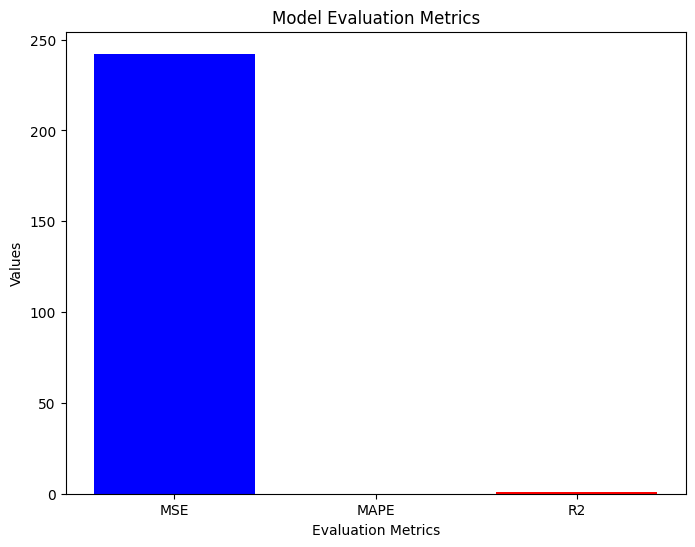

In [ ]:
# prompt: plot the suitable graph for the above model  evaluation

import matplotlib.pyplot as plt


# Create a list of evaluation metrics and their corresponding values
metrics = ['MSE', 'MAPE', 'R2']
values = [mse, mape, r2]

# Create a bar plot for the evaluation metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.show()



**RANDOM_FOREST - Predictin Network Spend for 2023**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/telecom_survey_data_2021_2023_pivot.csv')

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_NETWORK_SPEND_2021']
target = ['EST_NETWORK_SPEND_2023']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

Business_Name                   0
EMPLOYEES_HERE                  0
EMPLOYEES_TOTAL                 0
ACTIVE_LOC_EMPS                 0
SALES_VOLUME_DOLLARS_2023    1385
EST_NETWORK_SPEND_2022          0
EST_NETWORK_SPEND_2021          0
EST_SECURITY_SPEND_2022         0
EST_SECURITY_SPEND_2021         0
EST_SERVICES_SPEND_2022         0
EST_SERVICES_SPEND_2021         0
EST_VOICE_SPEND_2022            0
EST_VOICE_SPEND_2021            0
EST_NETWORK_SPEND_2023         19
EST_SECURITY_SPEND_2023       606
EST_SERVICES_SPEND_2023        25
EST_VOICE_SPEND_2023           19
dtype: int64
Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
SALES_VOLUME_DOLLARS_2023    0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_NE

In [ ]:
# Train-Test Split
X = data[features] # Now use the data without null values
y = data[target] # Now use the data without null values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# prompt: # Initialize the Linear Regression model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2021    0
dtype: int64
EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2021    0
dtype: int64


In [ ]:
# prompt: # Train the model for each target variable

predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = rf_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name ': bus_name_series})

average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                                 Business_Name   EST_NETWORK_SPEND_2023
3435                 Rob's Masonry & Remodeling                   344.0
4557                   Yourmembership.com, Inc.                  6520.0
2455                     Lambdin and Chaney LLP                   807.0
3452        Rocky Mountain Health Care Services                 13788.0
3496                   RPM Medical Billing, LLC                   402.0
...                                         ...                     ...
2388                            Kineticorp, LLC                  1614.0
272            Arcadia Aerospace Industries LLC                  5239.0
2780            Minyard Sunshine Air & Heat Inc                   344.0
2436     Lake Brantley High School Boosters Inc                   448.0
399   Baca County Department of Social Services                   387.0

[558 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'EST_NETWORK_SPEND_2021': X_test['EST_NETWORK_SPEND_2021'].head(20),  # Actual value
    'EST_NETWORK_SPEND_2023_Predicted': predictions['EST_NETWORK_SPEND_2023'][:20]  # Predicted value
})

# Display the top 30 records
print(top_20_summary_df)

                             Business_Name  EST_NETWORK_SPEND_2021  \
3435            Rob's Masonry & Remodeling                     310   
4557              Yourmembership.com, Inc.                    5868   
2455                Lambdin and Chaney LLP                     726   
3452   Rocky Mountain Health Care Services                   12409   
3496              RPM Medical Billing, LLC                     362   
247           Annunciation Catholic Church                     657   
3911             Supermarket Liquors, Inc.                     657   
538                 Bold Technologies Ltd.                   36215   
2637            Marianna Housing Authority                     382   
1789    Gilpin County School District Re-1                    3972   
2028                       Hill & Hill LLC                     366   
1856  Grand Valley Rural Power Lines, Inc.                     669   
756             Central Visitation Program                     362   
1224            Denv

In [ ]:
# prompt:  Calculate the average between actual and predicted values for each field for above df

# Calculate the average between actual and predicted values for each field
top_20_summary_df['Average_Difference_Network_Spend'] = (top_20_summary_df['EST_NETWORK_SPEND_2021'] + top_20_summary_df['EST_NETWORK_SPEND_2023_Predicted']) / 2

# Display the updated DataFrame with the average values
print(top_20_summary_df)


                             Business_Name  EST_NETWORK_SPEND_2021  \
3435            Rob's Masonry & Remodeling                     310   
4557              Yourmembership.com, Inc.                    5868   
2455                Lambdin and Chaney LLP                     726   
3452   Rocky Mountain Health Care Services                   12409   
3496              RPM Medical Billing, LLC                     362   
247           Annunciation Catholic Church                     657   
3911             Supermarket Liquors, Inc.                     657   
538                 Bold Technologies Ltd.                   36215   
2637            Marianna Housing Authority                     382   
1789    Gilpin County School District Re-1                    3972   
2028                       Hill & Hill LLC                     366   
1856  Grand Valley Rural Power Lines, Inc.                     669   
756             Central Visitation Program                     362   
1224            Denv

In [ ]:
# Export the combined actual and predicted DataFrame to a CSV file
top_20_summary_df.to_csv('actual_vs_predicted_network_spend_random_forest.csv', index=False)

In [ ]:
# For Jupyter notebooks or Google Colab, you can enable download using this:
from google.colab import files
files.download('actual_vs_predicted_network_spend_random_forest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Now model evaluation along with MAPE and R2 same as the mse - Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 12369479750428.908
Mean Absolute Percentage Error (MAPE): 0.0034629780423061506
R-squared (R2): 0.11399437826442649


Mean Squared Error (MSE): 12,369,479,750,428.91, a very high value, suggesting substantial errors in the model's predictions.

Mean Absolute Percentage Error (MAPE): 0.00346%, which is quite low, indicating that the relative percentage error is small despite the high MSE.

R-squared (R²): 0.114, meaning the model explains only 11.4% of the variance in the data, indicating a poor fit.

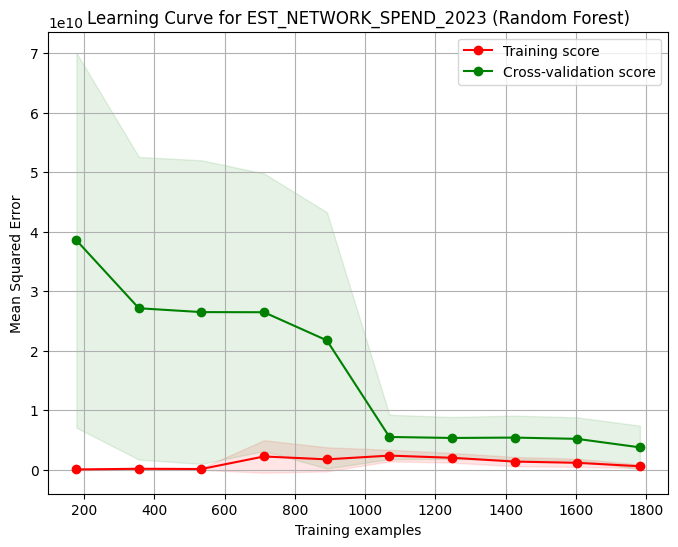

In [ ]:
# Lets Plot the learning curves for random forest

# Function to plot learning curves
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Loop through each target variable and plot its learning curve
for target_name in target:
    plot_learning_curves(rf_model, X_train, y_train[target_name], f"Learning Curve for {target_name} (Random Forest)")


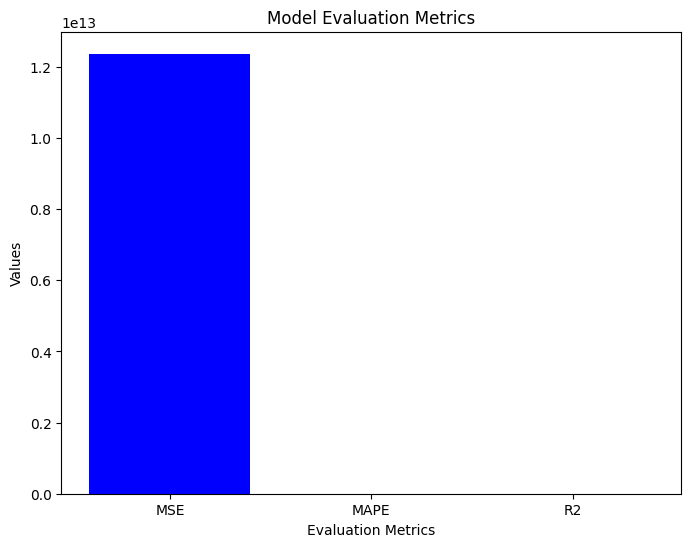

In [ ]:
# Lets plot the suitable graph for the above model  evaluation

import matplotlib.pyplot as plt

# Create a list of evaluation metrics and their corresponding values
metrics = ['MSE', 'MAPE', 'R2']
values = [mse, mape, r2]

# Create a bar plot for the evaluation metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.show()

***LINEAR_REGRESSION - Network Spend Prediction 2024***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load your dataset
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')

In [ ]:
# prompt: print null values and remove them
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

Business_Name                   0
EMPLOYEES_HERE                  0
EMPLOYEES_TOTAL                 0
ACTIVE_LOC_EMPS                 0
SALES_VOLUME_DOLLARS_2023    1385
EST_NETWORK_SPEND_2022          0
EST_NETWORK_SPEND_2021          0
EST_SECURITY_SPEND_2022         0
EST_SECURITY_SPEND_2021         0
EST_SERVICES_SPEND_2022         0
EST_SERVICES_SPEND_2021         0
EST_VOICE_SPEND_2022            0
EST_VOICE_SPEND_2021            0
EST_NETWORK_SPEND_2023         18
EST_SECURITY_SPEND_2023       605
EST_VOICE_SPEND_2023           18
EST_SERVICES_SPEND_2023        24
EST_NETWORK_SPEND_2024          0
EST_SECURITY_SPEND_2023.1       0
EST_VOICE_SPEND_2024            0
EST_SERVICES_SPEND_2024         0
dtype: int64
Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
SALES_VOLUME_DOLLARS_2023    0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021  

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_NETWORK_SPEND_2022']
target = ['EST_NETWORK_SPEND_2024']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2022    0
dtype: int64
EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2022    0
dtype: int64


In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

# Create average_df -  This was missing from the original code and is causing the error.
# Replace the columns with the ones you would like to see in your average_df
average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

In [ ]:
# Display the average values along with the BUSNAME
print(average_df_with_busname)

                            Business_Name  EST_NETWORK_SPEND_2024
3435           Rob's Masonry & Remodeling                     406
4557             Yourmembership.com, Inc.                    7694
2454           Lamar School District Re-2                   16498
3452  Rocky Mountain Health Care Services                   16270
3496             RPM Medical Billing, LLC                     474
...                                   ...                     ...
2387             Kindness Animal Hospital                     952
271       Arcadia Abstract & Title Co Inc                     537
2776      Mills Well Drilling & Pumps Inc                     406
2433              Ladek Enterprises, Inc.                     457
396                 B P O E Cenrings 1529                     457

[558 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business having Network Spend
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'EST_NETWORK_SPEND_2022': X_test['EST_NETWORK_SPEND_2022'].head(20),  # Actual value
    'EST_NETWORK_SPEND_2024_Predicted': predictions['EST_NETWORK_SPEND_2024'][:20]  # Predicted value
})

# Display the top 20 records
print(top_20_summary_df)

                                          Business_Name  \
3435                         Rob's Masonry & Remodeling   
4557                           Yourmembership.com, Inc.   
2454                         Lamar School District Re-2   
3452                Rocky Mountain Health Care Services   
3496                           RPM Medical Billing, LLC   
246                        Annoited Word Family Worship   
4026              The First National Bank of Mount Dora   
537                      Boeing Digital Solutions, Inc.   
2635                                            Margulf   
1788                   Gillco of Charlotte County, Inc.   
2026                              Highmark Suites Hotel   
1855  Grand Valley Board of Cooperative Educational ...   
754                                       Central Motel   
1222                          Denver Digital Signs, Inc   
3985                              The Ballard Group Inc   
4113                          Thomas J. McAlister, P.C. 

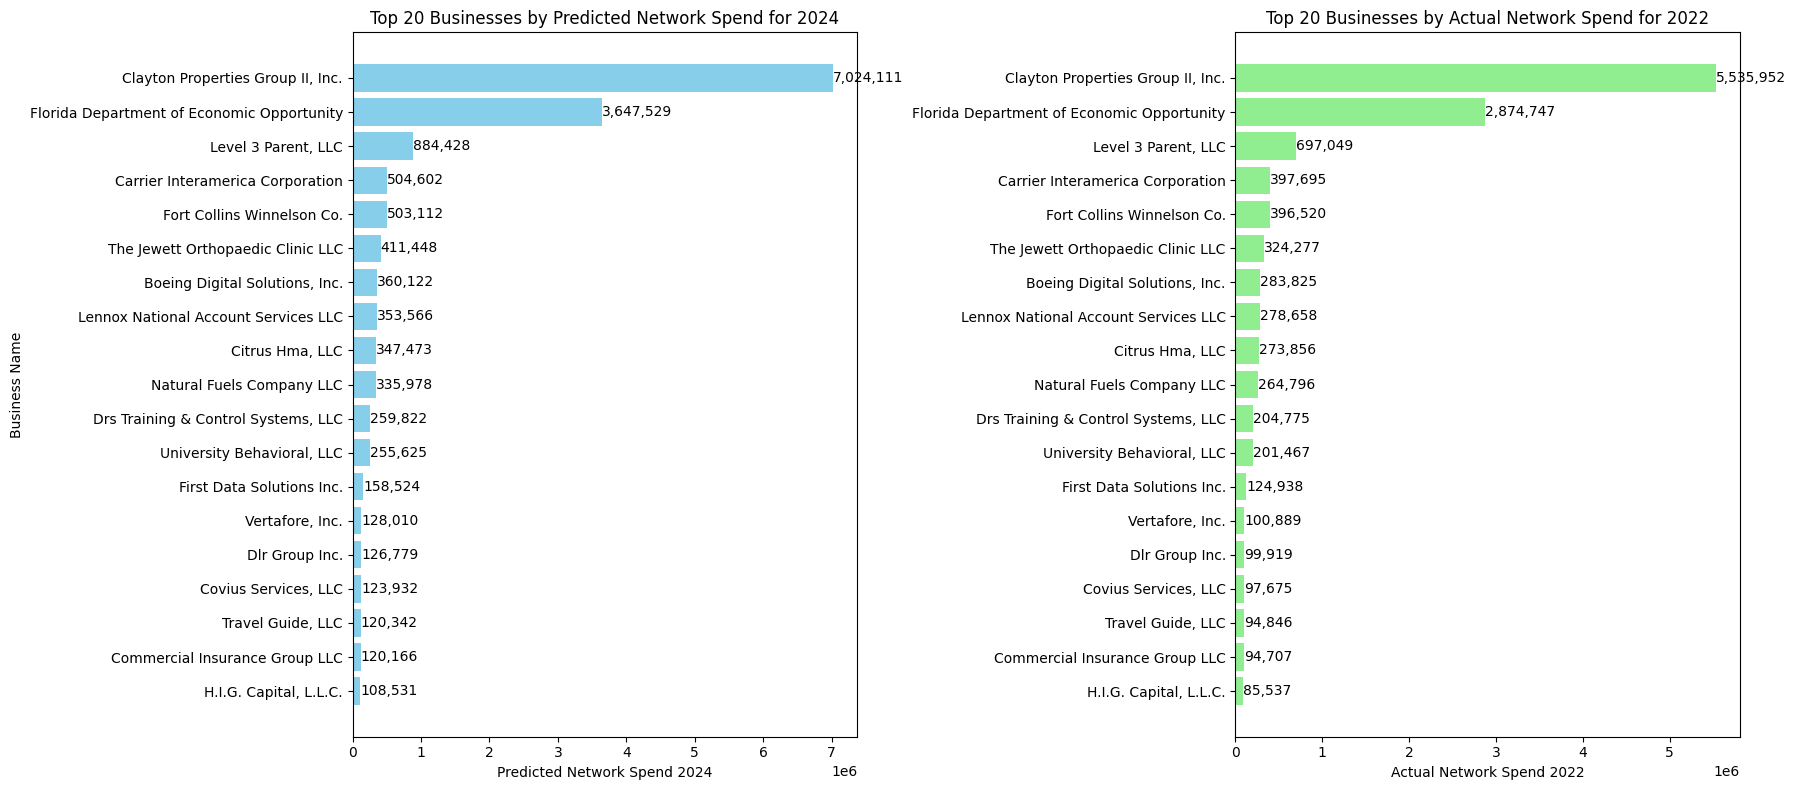

In [ ]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_NETWORK_SPEND_2024_Predicted': predictions['EST_NETWORK_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_NETWORK_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_NETWORK_SPEND_2022': X_test['EST_NETWORK_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_NETWORK_SPEND_2022', ascending=False).head(20)

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_NETWORK_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Network Spend for 2024')
axes[0].set_xlabel('Predicted Network Spend 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['EST_NETWORK_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Network Spend for 2022')
axes[1].set_xlabel('Actual Network Spend 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Top 20 Business Bar graph - Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_NETWORK_SPEND_2024_Predicted': predictions['EST_NETWORK_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_NETWORK_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_NETWORK_SPEND_2022': X_test['EST_NETWORK_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_NETWORK_SPEND_2022', ascending=False).head(20)

In [ ]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

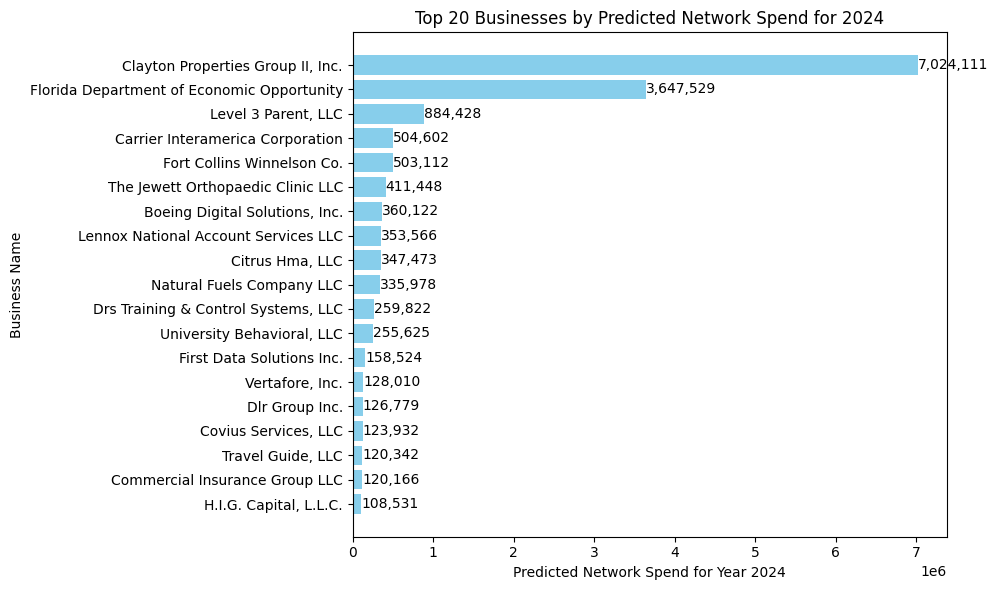

In [ ]:
# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
import matplotlib.pyplot as plt

# Sort the data in descending order based on 'EST_NETWORK_SPEND_2024_Predicted' so larger values appear first
top_20_2024 = top_20_2024.sort_values(by='EST_NETWORK_SPEND_2024_Predicted', ascending=False)

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
plt.figure(figsize=(10, 6))
bars_2024 = plt.barh(top_20_2024['Business_Name'], top_20_2024['EST_NETWORK_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    plt.text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

plt.title('Top 20 Businesses by Predicted Network Spend for 2024')
plt.xlabel('Predicted Network Spend for Year 2024')
plt.ylabel('Business Name')
plt.tight_layout()
plt.gca().invert_yaxis()  # To display the largest bar on top
plt.show()

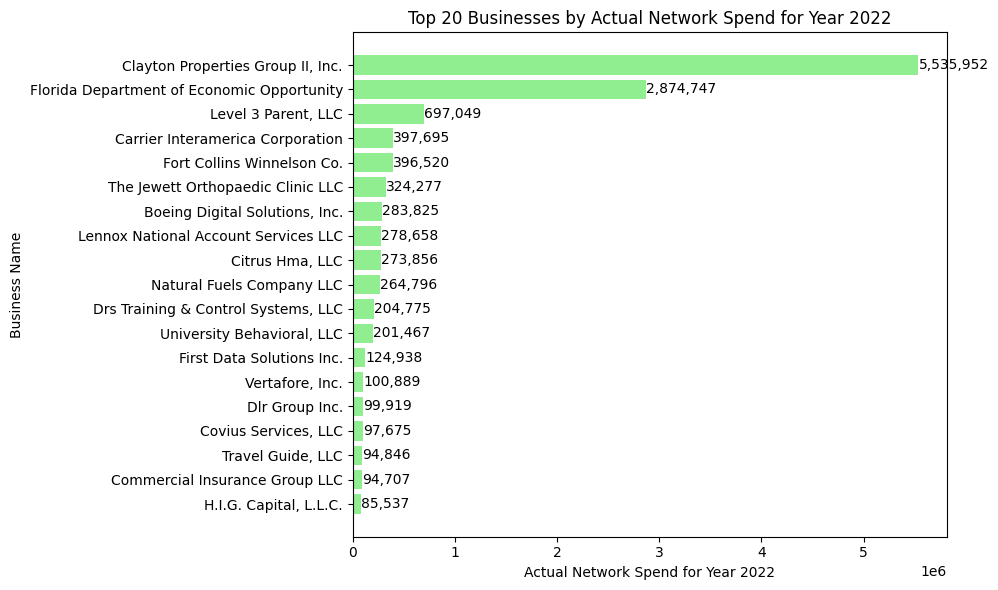

In [ ]:
#Two 20 Business Bar graph - Actual Network Spend for 2022
import matplotlib.pyplot as plt

# Sort the data in descending order based on 'EST_NETWORK_SPEND_2022' so larger values appear first
top_20_2022 = top_20_2022.sort_values(by='EST_NETWORK_SPEND_2022', ascending=False)

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
plt.figure(figsize=(10, 6))
bars_2022 = plt.barh(top_20_2022['Business_Name'], top_20_2022['EST_NETWORK_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    plt.text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

plt.title('Top 20 Businesses by Actual Network Spend for Year 2022')
plt.xlabel('Actual Network Spend for Year 2022')
plt.ylabel('Business Name')
plt.tight_layout()
plt.gca().invert_yaxis()  # To display the largest bar on top
plt.show()

In [ ]:
# Now model evaluation along with MAPE and R2 same as the mse - Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 582.0682476171147
Mean Absolute Percentage Error (MAPE): 0.0004595967633066319
R-squared (R2): 0.9999999999701217


MSE (582.07): Relatively low, indicating small prediction errors.

R² (0.99999999997): Nearly perfect, meaning the model explains almost all the variance in the data.

MAPE (0.00046%): Extremely low, showing excellent accuracy in percentage terms.

***GRADIENT Boosting - Predicting Network Spend for 2023***


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
# Load your dataset
data = pd.read_csv('/content/telecom_survey_data_2021_2023_pivot.csv')

In [ ]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

Business_Name                   0
EMPLOYEES_HERE                  0
EMPLOYEES_TOTAL                 0
ACTIVE_LOC_EMPS                 0
SALES_VOLUME_DOLLARS_2023    1385
EST_NETWORK_SPEND_2022          0
EST_NETWORK_SPEND_2021          0
EST_SECURITY_SPEND_2022         0
EST_SECURITY_SPEND_2021         0
EST_SERVICES_SPEND_2022         0
EST_SERVICES_SPEND_2021         0
EST_VOICE_SPEND_2022            0
EST_VOICE_SPEND_2021            0
EST_NETWORK_SPEND_2023         19
EST_SECURITY_SPEND_2023       606
EST_SERVICES_SPEND_2023        25
EST_VOICE_SPEND_2023           19
dtype: int64
Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
SALES_VOLUME_DOLLARS_2023    0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_NE

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_NETWORK_SPEND_2021']
target = ['EST_NETWORK_SPEND_2023']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())


EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2021    0
dtype: int64
EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2021    0
dtype: int64


In [ ]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = xgb_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                                  Business_Name  EST_NETWORK_SPEND_2023
3435                 Rob's Masonry & Remodeling                   344.0
4557                   Yourmembership.com, Inc.                  6520.0
2455                     Lambdin and Chaney LLP                   807.0
3452        Rocky Mountain Health Care Services                 13788.0
3496                   RPM Medical Billing, LLC                   402.0
...                                         ...                     ...
2388                            Kineticorp, LLC                  1614.0
272            Arcadia Aerospace Industries LLC                  5239.0
2780            Minyard Sunshine Air & Heat Inc                   344.0
2436     Lake Brantley High School Boosters Inc                   448.0
399   Baca County Department of Social Services                   387.0

[558 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business names
top_30_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),
    'EST_NETWORK_SPEND_2021': X_test['EST_NETWORK_SPEND_2021'].head(20),
    'EST_NETWORK_SPEND_2023_Predicted': predictions['EST_NETWORK_SPEND_2023'][:20]
})

# Display the top 30 records
print(top_30_summary_df)

                             Business_Name  EST_NETWORK_SPEND_2021  \
3435            Rob's Masonry & Remodeling                     310   
4557              Yourmembership.com, Inc.                    5868   
2455                Lambdin and Chaney LLP                     726   
3452   Rocky Mountain Health Care Services                   12409   
3496              RPM Medical Billing, LLC                     362   
247           Annunciation Catholic Church                     657   
3911             Supermarket Liquors, Inc.                     657   
538                 Bold Technologies Ltd.                   36215   
2637            Marianna Housing Authority                     382   
1789    Gilpin County School District Re-1                    3972   
2028                       Hill & Hill LLC                     366   
1856  Grand Valley Rural Power Lines, Inc.                     669   
756             Central Visitation Program                     362   
1224            Denv

In [ ]:
# Now calculate the average between actual and predicted values for each field for above df

# Calculate the average between actual and predicted values for each field
top_20_summary_df['Average_Difference_Network_Spend'] = (top_20_summary_df['EST_NETWORK_SPEND_2021'] + top_20_summary_df['EST_NETWORK_SPEND_2023_Predicted']) / 2

# Display the updated DataFrame with the average values
print(top_20_summary_df)


                             Business_Name  EST_NETWORK_SPEND_2021  \
3435            Rob's Masonry & Remodeling                     310   
4557              Yourmembership.com, Inc.                    5868   
2455                Lambdin and Chaney LLP                     726   
3452   Rocky Mountain Health Care Services                   12409   
3496              RPM Medical Billing, LLC                     362   
247           Annunciation Catholic Church                     657   
3911             Supermarket Liquors, Inc.                     657   
538                 Bold Technologies Ltd.                   36215   
2637            Marianna Housing Authority                     382   
1789    Gilpin County School District Re-1                    3972   
2028                       Hill & Hill LLC                     366   
1856  Grand Valley Rural Power Lines, Inc.                     669   
756             Central Visitation Program                     362   
1224            Denv

In [ ]:
# Export the combined actual and predicted DataFrame to a CSV file
top_20_summary_df.to_csv('actual_vs_predicted_network_spend_gradient boosting.csv', index=False)

In [ ]:
# For Jupyter notebooks or Google Colab, you can enable download using this:
from google.colab import files
files.download('actual_vs_predicted_network_spend_gradient boosting.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Model evaluation along with MAPE and R2 same as the mse - Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 12265523175129.559
Mean Absolute Percentage Error (MAPE): 0.0766743991574596
R-squared (R2): 0.12144061787918536


MSE (12,265,523,175,129.56): Very high, indicating large errors in the predictions.

MAPE (0.077%): Extremely low, meaning the average percentage error is quite small, indicating good accuracy in relative terms.

R² (0.121): The model explains only 12.1% of the variance in the data, which is quite poor.

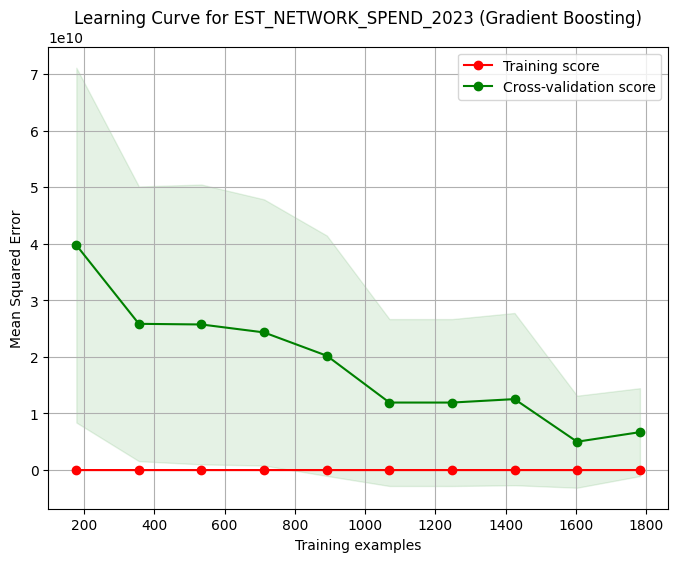

In [ ]:
# Plot the learning curves for GRADIENT Boosting
#Import the required module
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curves
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Loop through each target variable and plot its learning curve
for target_name in target:
    plot_learning_curves(xgb_model, X_train, y_train[target_name], f"Learning Curve for {target_name} (Gradient Boosting)")

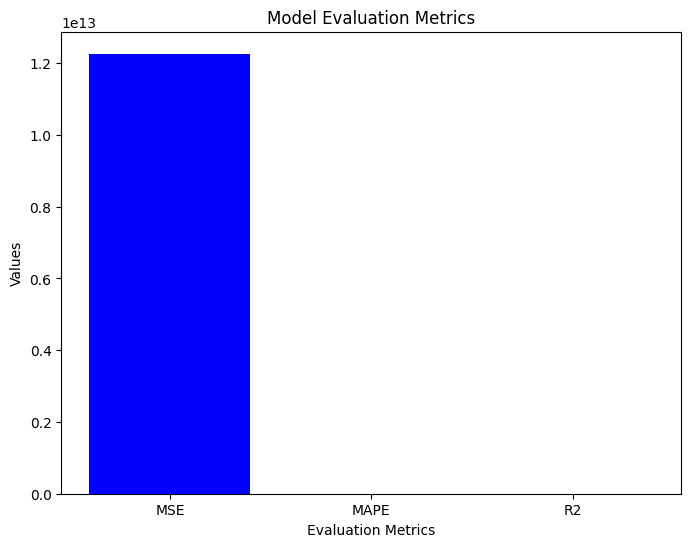

In [ ]:
# Now lets plot the suitable graph for the above model  evaluation

import matplotlib.pyplot as plt

# Create a list of evaluation metrics and their corresponding values
metrics = ['MSE', 'MAPE', 'R2']
values = [mse, mape, r2]

# Create a bar plot for the evaluation metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.show()

***ARIMA Model - Predict Network Spend for 2023 ***

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')

In [ ]:
# Step 3: Prepare the data for ARIMA (focus on network spend data)
# Assuming 'EST_NETWORK_SPEND_2021' and 'EST_NETWORK_SPEND_2022' are the columns for the previous years
network_spend_data = data[['EST_NETWORK_SPEND_2021', 'EST_NETWORK_SPEND_2022']]

In [ ]:
# Step 4: Flatten the data into a time series
network_spend_ts = network_spend_data.mean(axis=0)  # Average network spend for simplicity

In [ ]:
# Step 5: Train the ARIMA model
# Define the ARIMA model with the appropriate order (order can be tuned based on ACF/PACF)
model = ARIMA(network_spend_data.values.flatten(), order=(1, 1, 1))  # Example order (p=1, d=1, q=1) # Changed to flatten the 2D array into a 1D array
arima_result = model.fit()

In [ ]:
# Step 6: Forecast the network spend for 2023
forecast_steps = 1  # Forecast for the next period (2023)
forecast = arima_result.forecast(steps=forecast_steps)

print(f"Forecasted Network Spend for 2023: {forecast[0]}")

Forecasted Network Spend for 2023: 78149555.38506675


In [ ]:
# Step 7: Evaluate the model
# Since we don't have actual 2023 data, we'll use the fitted values for evaluation against 2021 and 2022 data
fitted_values = arima_result.fittedvalues

# Use the original data for evaluation, ensuring consistent shapes
actual_values = network_spend_data.values.flatten()

# Calculate MSE, R-squared, and MAPE
mse = mean_squared_error(actual_values, fitted_values)
r2 = r2_score(actual_values, fitted_values)
mape = mean_absolute_percentage_error(actual_values, fitted_values)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")

Mean Squared Error (MSE): 716517279584.1068
R-Squared: 0.5065946762200868
Mean Absolute Percentage Error (MAPE): 3.5998376062355083e+19%


MSE (716,517,279,584.11): Quite large, indicating significant prediction errors.

R² (0.507): The model explains about 50.7% of the variance, which is moderate but far from ideal.

MAPE (3.60e+19%): Extremely high, suggesting massive percentage errors in predictions, likely due to very small actual values or extreme outliers.

In [ ]:
# Step 8: Visualization of the forecast
# Prepare time labels for the plot
actual_dates = ['2021', '2022']
forecasted_dates = ['2023']

# Combine actual and forecasted values for the plot
combined_dates = actual_dates + forecasted_dates
combined_values = np.concatenate([fitted_values, forecast])

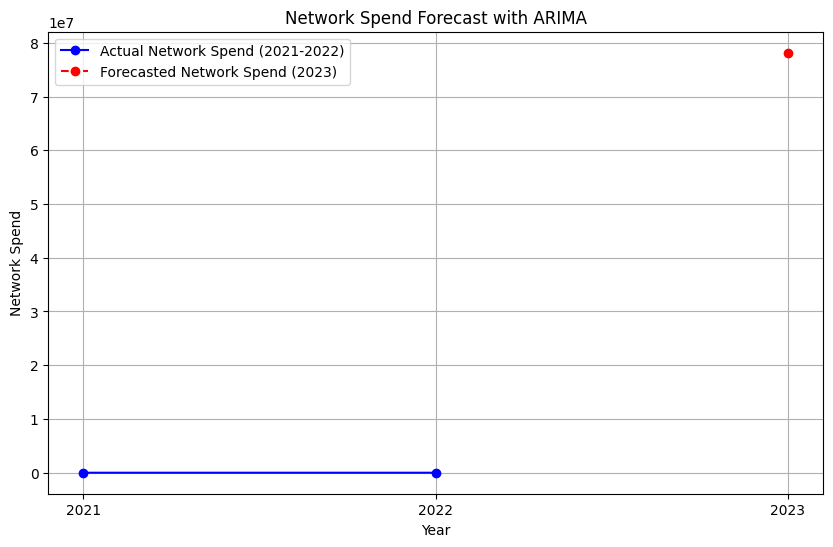

In [ ]:
# Step 8: Visualization of the forecast
# Prepare time labels for the plot
actual_dates = ['2021', '2022']
forecasted_dates = ['2023']

# Combine actual and forecasted values for the plot
combined_dates = actual_dates + forecasted_dates

# Use only the first two values from actual_values to match the length of actual_dates
actual_values_subset = actual_values[:2]
combined_values = np.concatenate([actual_values_subset, forecast])

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(actual_dates, actual_values_subset, label='Actual Network Spend (2021-2022)', color='blue', marker='o') # Use actual_values for the actual values
plt.plot(forecasted_dates, forecast, label='Forecasted Network Spend (2023)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Network Spend')
plt.title('Network Spend Forecast with ARIMA')
plt.legend()
plt.grid(True)
plt.show()